#### 01.Keras基本用法

In [1]:
import tensorflow as tf
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # from_logits=False 是因为使用了softmax，导致输入是概率分布
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20)

model.summary()

Epoch 1/500
4/4 [==============================] - 0s 997us/step - loss: 2.3173 - sparse_categorical_accuracy: 0.3417
Epoch 2/500
4/4 [==============================] - 0s 997us/step - loss: 1.0797 - sparse_categorical_accuracy: 0.6167
Epoch 3/500
4/4 [==============================] - 0s 1ms/step - loss: 0.8429 - sparse_categorical_accuracy: 0.6250
Epoch 4/500
4/4 [==============================] - 0s 749us/step - loss: 0.7448 - sparse_categorical_accuracy: 0.6667
Epoch 5/500
4/4 [==============================] - 0s 748us/step - loss: 0.9843 - sparse_categorical_accuracy: 0.6417
Epoch 6/500
4/4 [==============================] - 0s 1ms/step - loss: 0.7808 - sparse_categorical_accuracy: 0.6583
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 0.5961 - sparse_categorical_accuracy: 0.7250
Epoch 8/500
4/4 [==============================] - 0s 1ms/step - loss: 0.5824 - sparse_categorical_accuracy: 0.7250
Epoch 9/500
4/4 [==============================] - 0s 1ms/step -

#### 02.Keras自定义模型用法

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)

class IrisModel(Model):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.d1 = Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())

    def call(self, x):
        y = self.d1(x)
        return y

model = IrisModel()

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20)
model.summary()



Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 2.3173 - sparse_categorical_accuracy: 0.3417
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 1.0797 - sparse_categorical_accuracy: 0.6167
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.8429 - sparse_categorical_accuracy: 0.6250
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 0.7448 - sparse_categorical_accuracy: 0.6667
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.9843 - sparse_categorical_accuracy: 0.6417
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7808 - sparse_categorical_accuracy: 0.6583
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5961 - sparse_categorical_accuracy: 0.7250
Epoch 8/500
4/4 [==============================] - 0s 1ms/step - loss: 0.5824 - sparse_categorical_accuracy: 0.7250
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0

#### 03.MNIST

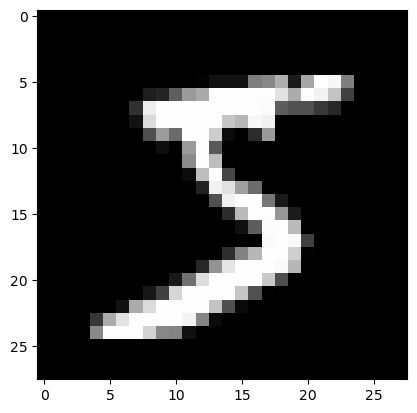

x_train[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

In [3]:
import tensorflow as tf
from matplotlib import pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 可视化训练集输入特征的第一个元素
plt.imshow(x_train[0], cmap='gray')  # 绘制灰度图
plt.show()

# 打印出训练集输入特征的第一个元素
print("x_train[0]:\n", x_train[0])
# 打印出训练集标签的第一个元素
print("y_train[0]:\n", y_train[0])

# 打印出整个训练集输入特征形状
print("x_train.shape:\n", x_train.shape)
# 打印出整个训练集标签的形状
print("y_train.shape:\n", y_train.shape)
# 打印出整个测试集输入特征的形状
print("x_test.shape:\n", x_test.shape)
# 打印出整个测试集标签的形状
print("y_test.shape:\n", y_test.shape)

In [4]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2508 - sparse_categorical_accuracy: 0.9294 - val_loss: 0.1320 - val_sparse_categorical_accuracy: 0.9597
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1118 - sparse_categorical_accuracy: 0.9668 - val_loss: 0.1036 - val_sparse_categorical_accuracy: 0.9693
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0758 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.0860 - val_sparse_categorical_accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0581 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0778 - val_sparse_categorical_accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0439 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0734 - val_sparse_categorical_accuracy: 0.9775
Model: "sequential_1"
_________________________________________________________________
Layer (

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y


model = MnistModel()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2601 - sparse_categorical_accuracy: 0.9265 - val_loss: 0.1397 - val_sparse_categorical_accuracy: 0.9568
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1128 - sparse_categorical_accuracy: 0.9666 - val_loss: 0.0980 - val_sparse_categorical_accuracy: 0.9719
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9774 - val_loss: 0.0866 - val_sparse_categorical_accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0573 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.0728 - val_sparse_categorical_accuracy: 0.9768
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0759 - val_sparse_categorical_accuracy: 0.9764
Model: "mnist_model"
_________________________________________________________________
Layer (t

#### 04.FASION

In [6]:
import tensorflow as tf

fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()


4423680/4422102 [==============================] - 2s 0us/step
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5023 - sparse_categorical_accuracy: 0.8243 - val_loss: 0.4139 - val_sparse_categorical_accuracy: 0.8519
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3773 - sparse_categorical_accuracy: 0.8641 - val_loss: 0.4053 - val_sparse_categorical_accuracy: 0.8566
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3372 - sparse_categorical_accuracy: 0.8774 - val_loss: 0.3844 - val_sparse_categorical_accuracy: 0.8620
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3146 - sparse_categorical_accuracy: 0.8846 - val_loss: 0.3703 - val_sparse_categorical_accuracy: 0.8652
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2967 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.3666 - val_sparse_categorical_accuracy: 0.8675
Model: "sequential_2"
__________

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y


model = MnistModel()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4998 - sparse_categorical_accuracy: 0.8241 - val_loss: 0.4051 - val_sparse_categorical_accuracy: 0.8543
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3737 - sparse_categorical_accuracy: 0.8652 - val_loss: 0.4044 - val_sparse_categorical_accuracy: 0.8572
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3347 - sparse_categorical_accuracy: 0.8785 - val_loss: 0.3784 - val_sparse_categorical_accuracy: 0.8629
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3126 - sparse_categorical_accuracy: 0.8857 - val_loss: 0.3707 - val_sparse_categorical_accuracy: 0.8645
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2967 - sparse_categorical_accuracy: 0.8917 - val_loss: 0.3506 - val_sparse_categorical_accuracy: 0.8698
Model: "mnist_model_1"
_________________________________________________________________
Layer 